<a href="https://colab.research.google.com/github/Puneet-Suthar/airbnb-booking-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_individual_notebook_Puneet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

"\n# Setting chart image quality parameter\nplt.rcParams['figure.dpi'] = 100\nplt.rcParams['savefig.dpi'] = 100\n"

# **Loading the Airbnb (NYC) 2019 dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone projects/Project 1 -  EDA - Airbnb booking Analysis/Airbnb_NYC_2019.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Having overview and understanding the dataset**

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# What is the meaning of each column type is described below: 
#+--------------------------------+------------------------------------------------------+
#| 1. id                             | listing id                                           |
#+--------------------------------+------------------------------------------------------+
#| 2. name                           | name of the Property                                 |
#+--------------------------------+------------------------------------------------------+
#| 3. host_id                        | host ID                                              |
#+--------------------------------+------------------------------------------------------+
#| 4. host_name                      | name of the host                                     |
#+--------------------------------+------------------------------------------------------+
#| 5. neighbourhood_group            | location                                             |
#+--------------------------------+------------------------------------------------------+
#| 6. neighbourhood                  | area                                                 |
#+--------------------------------+------------------------------------------------------+
#| 7. latitude                       | latitude coordinates                                 |
#+--------------------------------+------------------------------------------------------+
#| 8. longitude                      | longitude                                            |
#+--------------------------------+------------------------------------------------------+
#| 9. room_type                      | listing space type                                   |
#+--------------------------------+------------------------------------------------------+
#| 10. price                          | price in dollars                                     |
#+--------------------------------+------------------------------------------------------+
#| 11. minimum_nights                 | amount of nights minimum                             |
#+--------------------------------+------------------------------------------------------+
#| 12. number_of_reviews              | number of reviews                                    |
#+--------------------------------+------------------------------------------------------+
#| 13. last_review                    | latest review                                        |
#+--------------------------------+------------------------------------------------------+
#| 14. reviews_per_month              | number of reviews per month                          |
#+--------------------------------+------------------------------------------------------+
#| 15. calculated_host_listings_count | amount of listing per host                           |
#+--------------------------------+------------------------------------------------------+
#| 16. availability_365               | number of days when listing is available for booking |
#+--------------------------------+------------------------------------------------------+

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Finding null values in the dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Four coulmns are having null values.

For columns:  **last_review and reviews_per_month, these have more than 10k null values**.
We can drop **last_review** column, as we will not use this column. 
For null values in **reviews_per_month** columns, we replace null values with 0.
 I suspect that these two columns are related and so have the same numbers of missing values.

For columns: **name and host_name** we will replace null value by "Not Applicable".


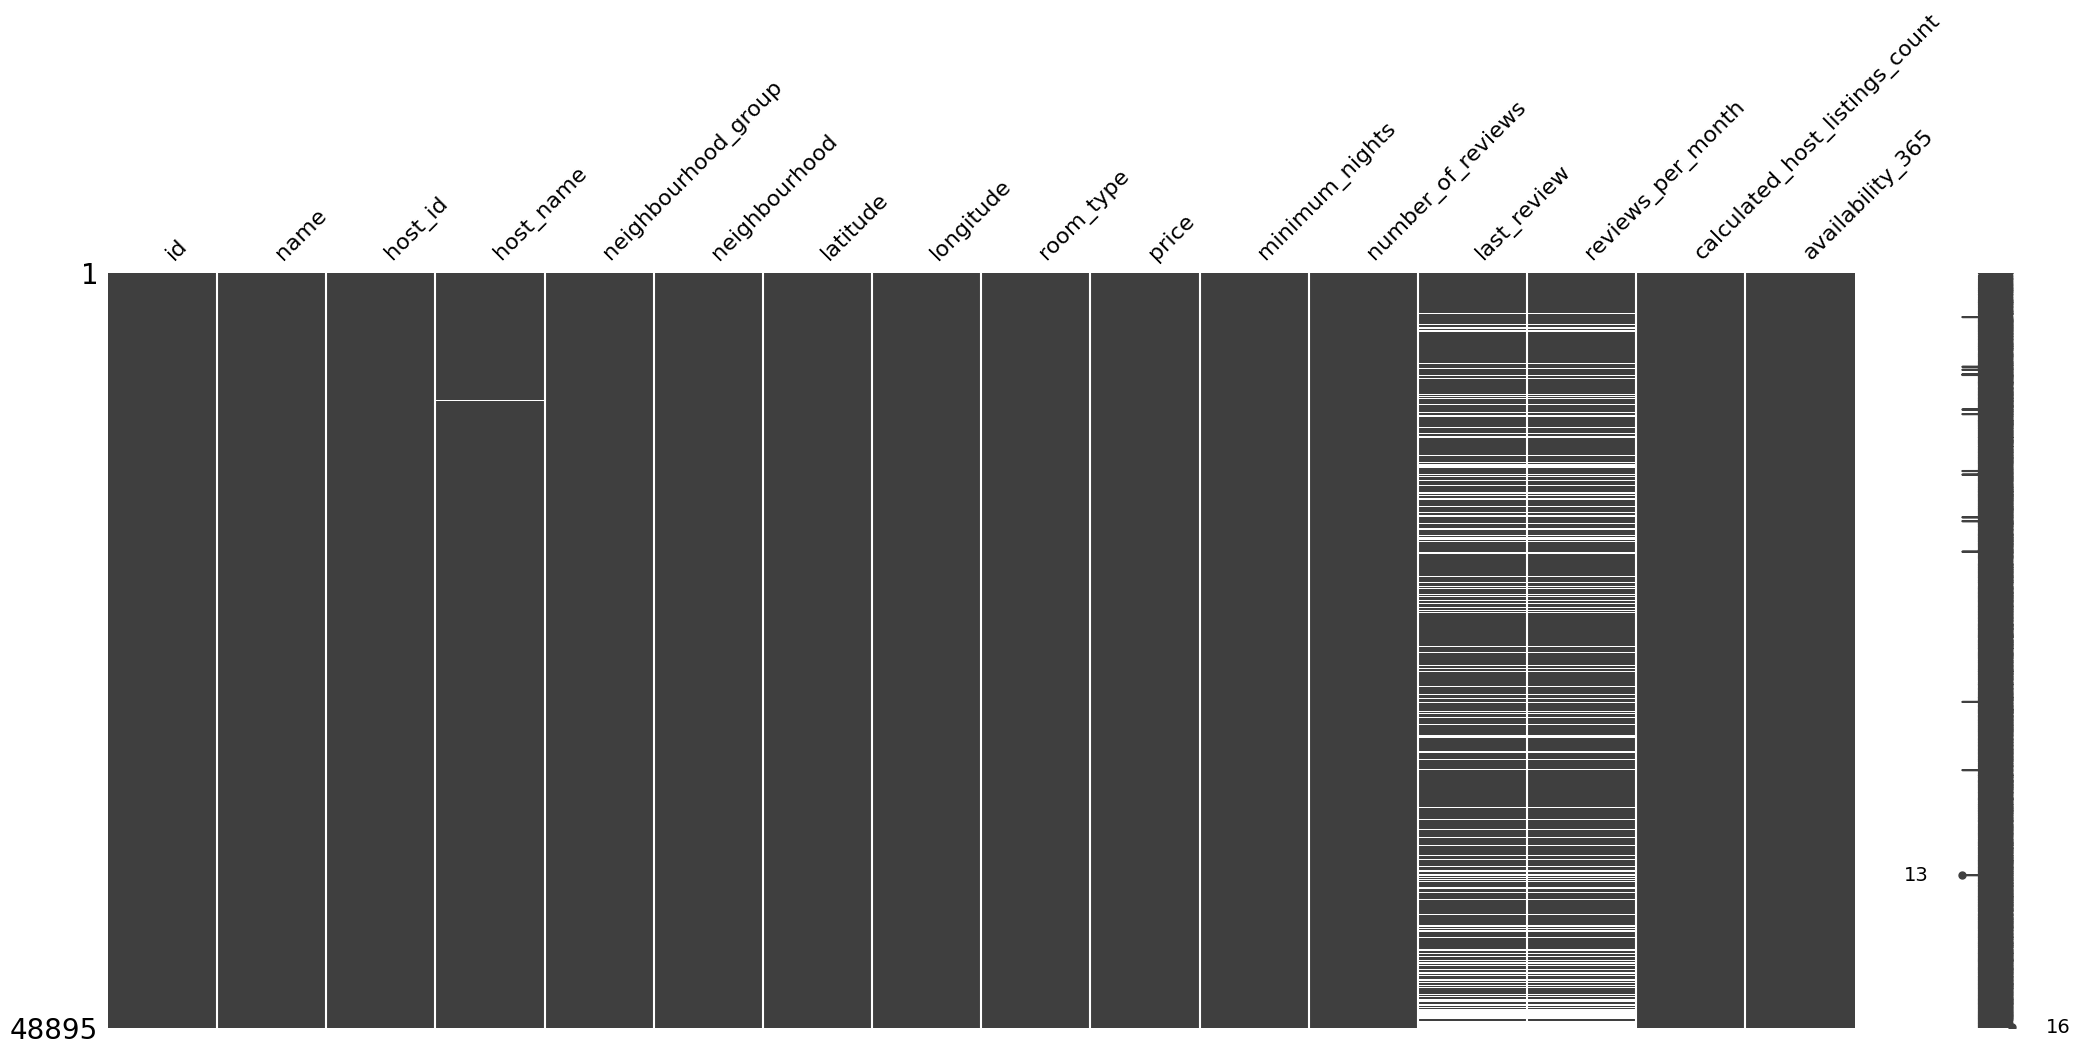

In [ ]:
#The matrix below shows the nan values in each of the feature of the data
# The horizontal white line in each columns represents the nan value
# The column of reviews_per_month contains the most nan values
msno.matrix(df)

In [ ]:
# Insight about unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

Inference: 
1. All data ids of listing are unique so there in no duplicacy.
2. Host_name have been repeated, so some customer have stayed in different property.
3. New york is divided in 5 neighbourhood group.
4. There are 3 types of room rented in New york.

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In the above dataset we can note down following things:- 
   
1.   Cheapest room starts from 0, which can't be possible.
2.   Room mean price is 152.72
3.   25% rooms have 0 availability over year, which makes no sense.
4.   Average availability of rooms in Airbnb is 112 days in a year 
5.   Average minimum_night are 7



In [ ]:
# Finding types of neighbourhood Groups
pd.DataFrame(df.neighbourhood_group.unique(),columns = ['neighbourhood_group'])

,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Queens
3,Staten Island
4,Bronx


In [ ]:
# Finding types of Room type
pd.DataFrame(df.room_type.unique(),columns = ['room_type'])

,room_type
0,Private room
1,Entire home/apt
2,Shared room


# **DATA Cleaning**

## Things to be handeled


1. Drop last review   
2. Null Values
3.   Zero values



In [ ]:
# Dropping last_review Column 
df.drop(['last_review'], axis = 1 , inplace = True)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
# Null values in reviews_per_month are 10k
# Replacing review_per_month null values with 0
df['reviews_per_month'].fillna(0, inplace = True)

# Replacing all null values of name and host_name with NOT APPLICABLE
df['name'].fillna("Not Applicable", inplace = True)
df['host_name'].fillna("Not Applicable", inplace = True)

# Checking if there is any null value
print(df.isnull().any())

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


## Droping some rows having *minimum_nights > availability_365*

In [ ]:
list_of_index_of_bad_rows = df[(df['minimum_nights'] > df['availability_365']) & (df['availability_365'] >0 )].index.tolist()
df = df.drop(list_of_index_of_bad_rows)

In [ ]:
len(list_of_index_of_bad_rows)

833


## Data manipulation
---



In [ ]:
# Checking if there is any property having price = 0
df[df['price'] == 0].shape

(11, 15)

This means 11 property have zero price which is NOT OK, it can be a data entry mistake

In [ ]:
# Checking if there is any property having minimum_nights = 0
df[df['minimum_nights'] == 0].shape

(0, 15)

In [ ]:
# Checking if there is any property having minimum_nights > availability_365
df[df['minimum_nights'] > df['availability_365']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,0.00,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,0.00,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,0.00,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,0.00,1,0


From customer prespective having min night > avalibility is not good.

In [ ]:
df[df['availability_365'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,0.00,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,0.00,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,0.00,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,0.00,1,0


There is no sence of property listing if it is no available for atleast a single day. 

### Assigning mean value of price to those listing whose price is 0, with respect to type of room, neighbourhood group 

In [ ]:
# Mean price of all room types in all neighbour hood group
df_mean_price = df.groupby(["neighbourhood_group","room_type"])['price'].mean().reset_index(name='Mean Price')
df_mean_price

,neighbourhood_group,room_type,Mean Price
0,Bronx,Entire home/apt,127.360000
1,Bronx,Private room,66.867284
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,179.082466
4,Brooklyn,Private room,76.640759
5,Brooklyn,Shared room,50.630170
6,Manhattan,Entire home/apt,250.710377
7,Manhattan,Private room,115.778045
8,Manhattan,Shared room,89.090336
9,Queens,Entire home/apt,146.366231


In [ ]:
# Replacing 0 price with mean price WRT room type and neighbourhood group

for index in df.index:
  if  df['price'][index] == 0:

    if df['room_type'][index] == 'Entire home/apt':

      if df['neighbourhood_group'][index] == 'Bronx':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Bronx') & (df_mean_price['room_type']=='Entire home/apt')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Brooklyn':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Brooklyn') & (df_mean_price['room_type']=='Entire home/apt')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Manhattan':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Manhattan') & (df_mean_price['room_type']=='Entire home/apt')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Queens':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Queens') & (df_mean_price['room_type']=='Entire home/apt')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Staten Island':
       df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Staten Island') & (df_mean_price['room_type']=='Entire home/apt')]['Mean Price']  
   
    if df['room_type'][index] == 'Private room':

      if df['neighbourhood_group'][index] == 'Bronx':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Bronx') & (df_mean_price['room_type']=='Private room')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Brooklyn':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Brooklyn') & (df_mean_price['room_type']=='Private room')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Manhattan':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Manhattan') & (df_mean_price['room_type']=='Private room')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Queens':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Queens') & (df_mean_price['room_type']=='Private room')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Staten Island':
       df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Staten Island') & (df_mean_price['room_type']=='Private room')]['Mean Price']  

    if df['room_type'][index] == 'Shared room':

      if df['neighbourhood_group'][index] == 'Bronx':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Bronx') & (df_mean_price['room_type']=='Shared room')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Brooklyn':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Brooklyn') & (df_mean_price['room_type']=='Shared room')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Manhattan':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Manhattan') & (df_mean_price['room_type']=='Shared room')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Queens':
        df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Queens') & (df_mean_price['room_type']=='Shared room')]['Mean Price'] 
      elif df['neighbourhood_group'][index] == 'Staten Island':
       df['price'][index] =  df_mean_price[(df_mean_price['neighbourhood_group']=='Staten Island') & (df_mean_price['room_type']=='Shared room')]['Mean Price']  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

In [ ]:
# Checking if there is any property left with price = 0
df[df['price'] == 0 ].count()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Data visualization

### 1. Corelation matrix

In [ ]:
corelation = df.corr()

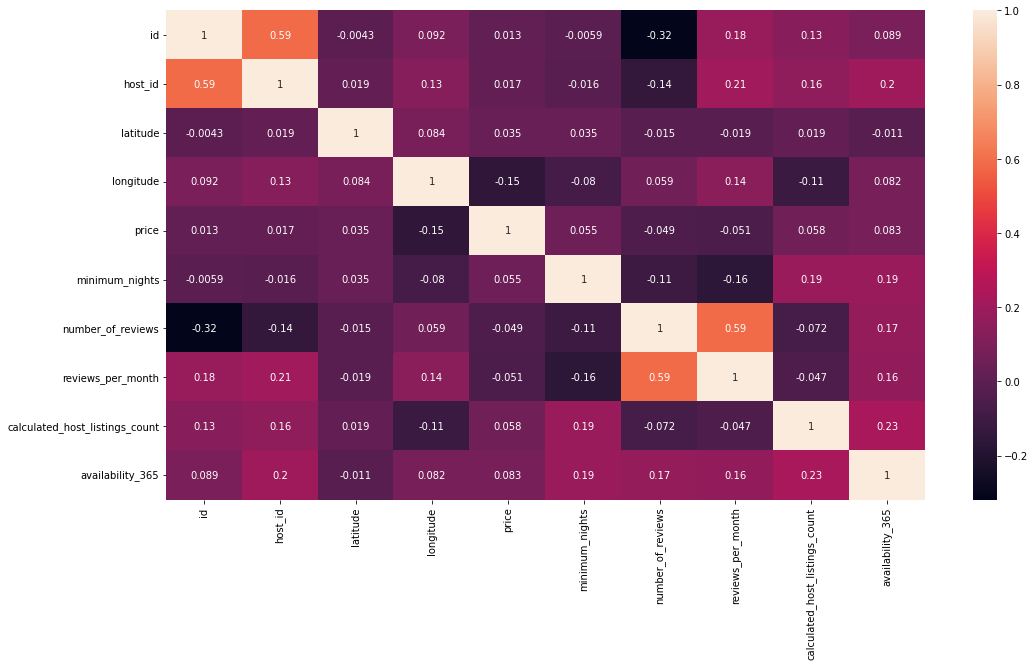

In [ ]:
plt.figure(figsize=(17,9))
sns.heatmap(corelation,  xticklabels = corelation.columns, yticklabels = corelation.columns, annot =True)

Inference: ***number_of_reviews*** and ***reviews_per_month*** are some what related

### 2. Pair plot

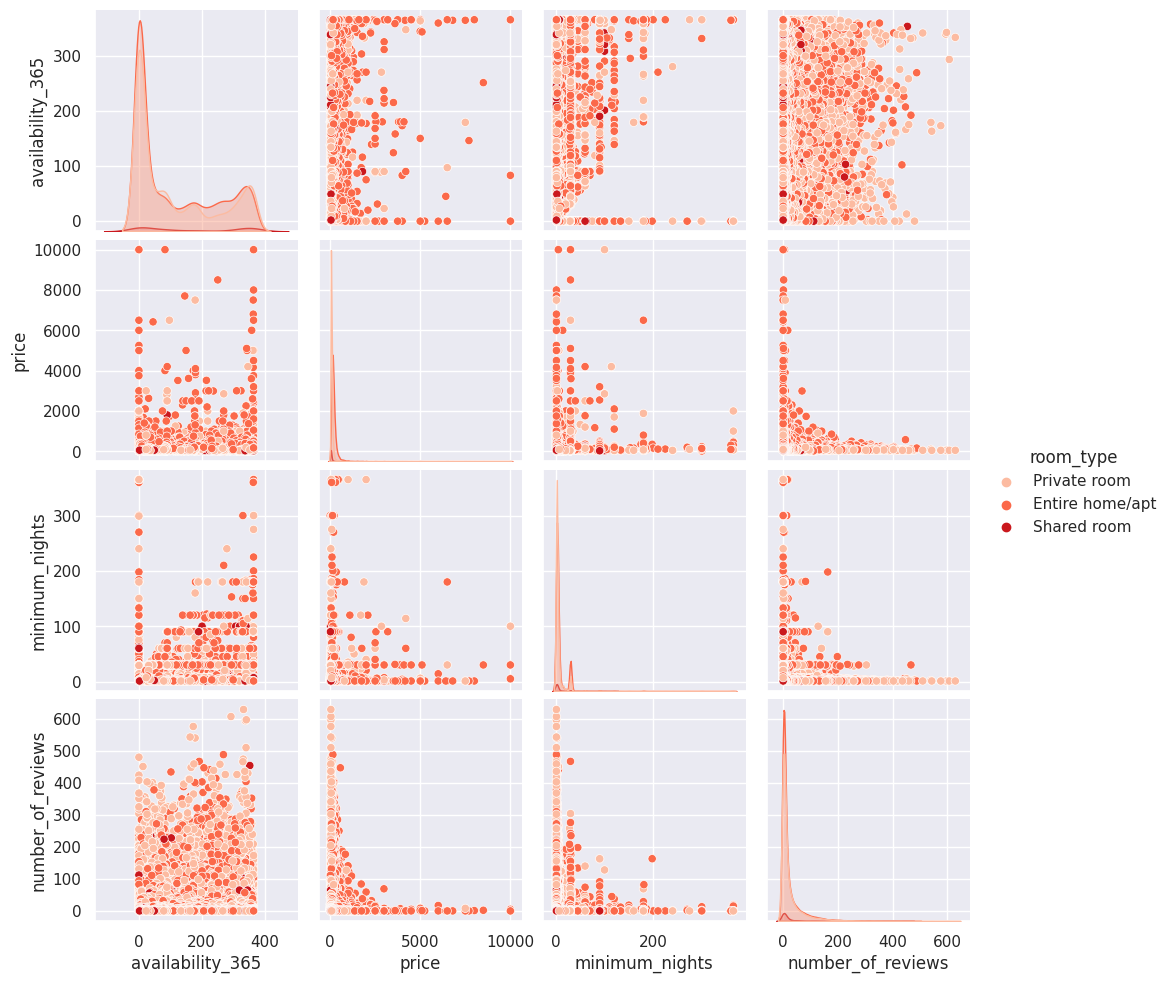

In [ ]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
df_pairplot = df[['availability_365','price','minimum_nights', 'room_type','number_of_reviews']].copy()
sns.pairplot(df_pairplot, hue= 'room_type', palette= 'Reds')


Inference:-
1. From minimum_nights vs avability_365 :-      unexpected minimum nights at 0 availability
2. From price and minimum nights :- As minimum nights of booking increase price decreases significantly.
3. From number of reviews and price :- There are more number of reviews where price is low
 

# **Analysing Data**

## 1. Count of properties in different neighbourhood_group

In [ ]:
# Relation between room type and neighbourhood group
no_of_prop = df.groupby(["neighbourhood_group","room_type"])['id'].count().reset_index(name='no_of_prop')
no_of_prop

,neighbourhood_group,room_type,no_of_prop
0,Bronx,Entire home/apt,375
1,Bronx,Private room,648
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9325
4,Brooklyn,Private room,10010
5,Brooklyn,Shared room,411
6,Manhattan,Entire home/apt,12903
7,Manhattan,Private room,7889
8,Manhattan,Shared room,476
9,Queens,Entire home/apt,2067


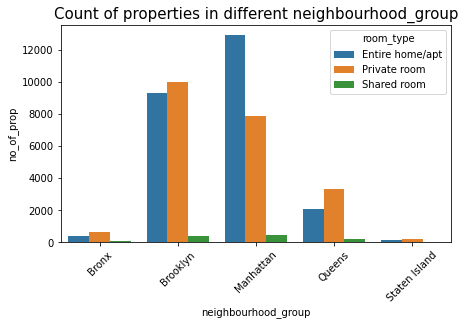

In [ ]:
# Ploting bar graph amoung room type and neighbourhood group 
plt.figure(figsize=(7,4))
sns.barplot(x='neighbourhood_group', y='no_of_prop',hue ='room_type', data=no_of_prop)
plt.xticks(rotation = 45)

plt.title('Count of properties in different neighbourhood_group', size = 15)

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

Inference:
1. In all the three types of room, Shared room is least in every neighbourhood. This shows that in New York people dosent like to share room.
2. In manhatten mostly home and apartment are listed this means people in this area people are leaving with their families.

## 2. Checking availability of different room and different neighbourhood group.}

In [ ]:
|# Creating Data Frame of different neighbourhood_group , room_type and mean of availability_365
mean_aval = df.groupby(["neighbourhood_group","room_type"])['availability_365'].mean().reset_index(name='availability_365')
mean_aval

,neighbourhood_group,room_type,availability_365
0,Bronx,Entire home/apt,159.290667
1,Bronx,Private room,171.824074
2,Bronx,Shared room,154.216667
3,Brooklyn,Entire home/apt,99.298338
4,Brooklyn,Private room,100.833966
5,Brooklyn,Shared room,178.868613
6,Manhattan,Entire home/apt,119.457646
7,Manhattan,Private room,102.867157
8,Manhattan,Shared room,138.934874
9,Queens,Entire home/apt,133.688437


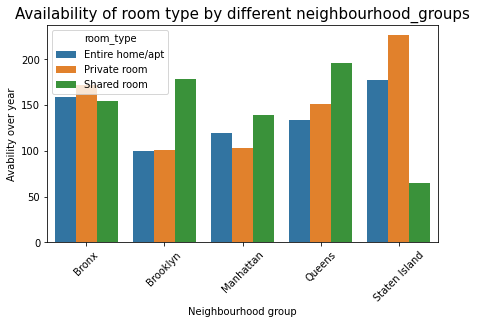

In [ ]:
# Availibility according to neighbourhood group and room type.
plt.figure(figsize=(7,4))
sns.barplot(x='neighbourhood_group', y='availability_365',hue ='room_type', data=mean_aval)
plt.xticks(rotation = 45,size =10,)
ax = plt.gca()

plt.title('Availability of room type by different neighbourhood_groups', size = 15)
plt.xlabel('Neighbourhood group')
plt.ylabel('Avability over year')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend


Inference:
1. From previous analysis we got to know that Manhatten and Brroklyn have highest count of property, this graph shows  Manhatten and Brroklyn have less availibility then compared to other neighbourhood which is good for the host having these propeties.

2. Having property in staten island and bronx is a loss making business for the host as they are empty half of year.


## 3. Finding host having highest no. of properties

In [ ]:
# Finding host having highest no. of properties
top_10_host_id = df['host_id'].value_counts().sort_values(ascending = False).head(10)
top_10_host_id

219517861    327
107434423    220
30283594     121
137358866    101
16098958      96
12243051      91
61391963      89
22541573      87
200380610     65
1475015       52
Name: host_id, dtype: int64

In [ ]:
name_list = []
for i in top_10_host_id.index:
  name_list.append(df[df['host_id'] == i]['host_name'].unique())

new_name = []
for i in range(10):
  new_name.append(name_list[i][0])

print(new_name)

['Sonder (NYC)', 'Blueground', 'Kara', 'Kazuya', 'Jeremy & Laura', 'Sonder', 'Corporate Housing', 'Ken', 'Pranjal', 'Mike']


In [ ]:
x = new_name
y = top_10_host_id.to_list()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


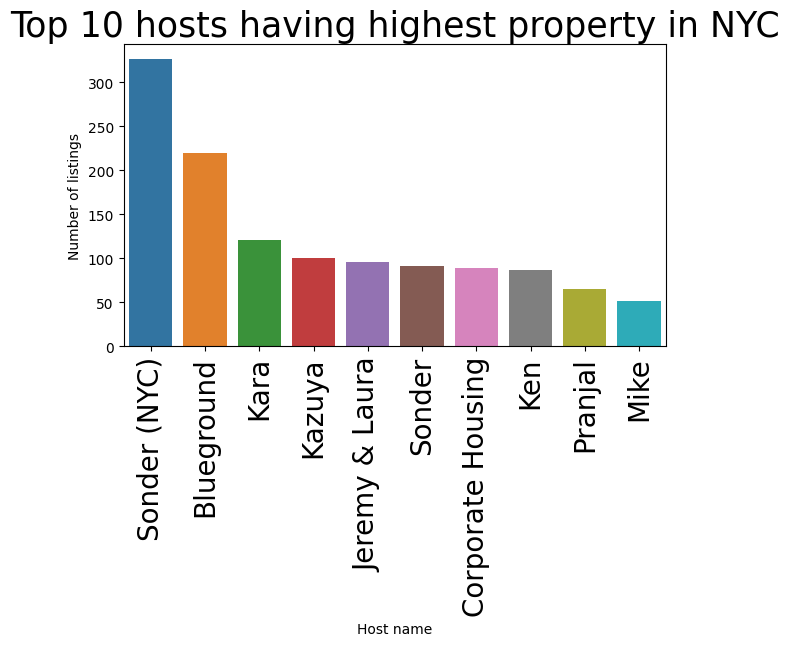

In [ ]:
# Ploting bar graph to visualize number_of_reviews by neighbourhood_group
plt.figure(figsize=(7,4))
sns.barplot(x , y)

plt.xticks(rotation = 90,size =20)

plt.title('Top 10 hosts having highest property in NYC', size = 25)
plt.xlabel('Host name')
plt.ylabel('Number of listings')

plt.rc('font', size=10)
plt.rc('axes', titlesize=10) 
plt.rc('axes', labelsize=10) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('legend', fontsize=10) 


### Inference 
Sonder (NYC) has hights listings (327)


## 4. Pie chart of listings in neighbourhood group

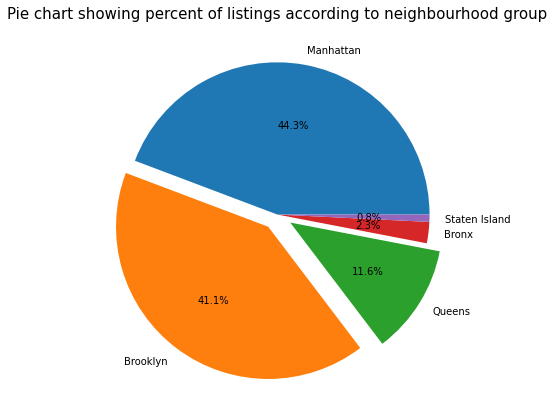

In [ ]:
# Finding no. of Airbnb listing neighbourhood_group wise. 
groupwise_listing = df["neighbourhood_group"].value_counts(sort=True)

# Showing data percentage wise
plt.figure(figsize=(7,7))
exp = [0, 0.1, 0.1, 0, 0]
plt.pie(groupwise_listing,labels = groupwise_listing.index, explode = exp , autopct='%1.1f%%' )
plt.title("Pie chart showing percent of listings according to neighbourhood group" , size =15)
plt.show()

Result:

1. Manhatten & Brooklyn are having high no. of listing.
2. Staten island and Bronx have low no. of listing.

Inference: If I want to do advertisement or marketing for selling flats I will focus on Manhatten and Brooklyn.

### 5. Which neighbour hood group is most reviewed

In [ ]:
# Sum of reviews by neighbourhood_group 
rev_nbhd = df.groupby(["neighbourhood_group"])['number_of_reviews'].sum().reset_index()
rev_nbhd

,neighbourhood_group,number_of_reviews
0,Bronx,28096
1,Brooklyn,480227
2,Manhattan,447875
3,Queens,156133
4,Staten Island,11541


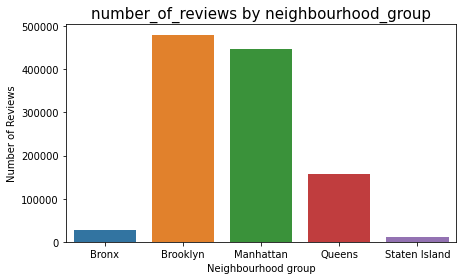

In [ ]:
# Ploting bar graph to visualize number_of_reviews by neighbourhood_group
plt.figure(figsize=(7,4))
sns.barplot(x= 'neighbourhood_group' , y= 'number_of_reviews', data = rev_nbhd)

plt.title('number_of_reviews by neighbourhood_group', size = 15)
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of Reviews')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

## 6. Cheapest listing on the basis of min nights and price

In [ ]:
df['min_price_to_stay']= (df['price']*df['minimum_nights'])

In [ ]:
new_df = pd.DataFrame().assign(name = df["name"], min_price_to_stay = df["min_price_to_stay"], min_nights = df['minimum_nights'])
new_df.sort_values(by = 'min_price_to_stay', ascending = True, inplace= True)
new_df.head(10)

,name,min_price_to_stay,min_nights
34446,Bronx Apart,10,1
27972,Spacious 2-bedroom Apt in Heart of Greenpoint,10,1
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",10,1
24100,"Girls only, cozy room one block from Times Square",10,1
32810,Gigantic Sunny Room in Park Slope-Private Back...,10,1
33505,Room with a view,10,1
21700,Couch in Harlem Harvey Refugees only,10,1
47218,Beautiful room in Bushwick,10,1
22835,IT'S SIMPLY CONVENIENT!,10,1
35005,sofa Bed And Breakfast,11,1


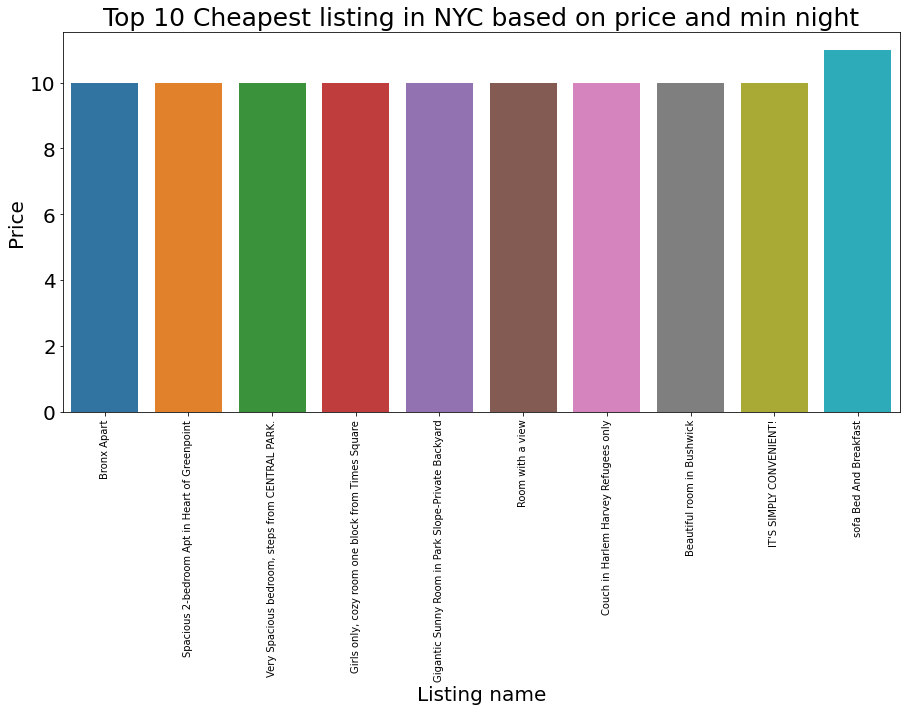

In [ ]:
plt.figure(figsize=(15,7))

sns.barplot(x='name', y='min_price_to_stay',data=new_df.head(10),errwidth=0)
plt.xticks(rotation = 90,size =10)

plt.title('Top 10 Cheapest listing in NYC based on price and min night', size = 25)
plt.xlabel('Listing name')
plt.ylabel('Price')

s = 20

plt.rc('font', size=s) 
plt.rc('axes', titlesize=s) 
plt.rc('axes', labelsize=s) 
plt.rc('xtick', labelsize=s) 
plt.rc('ytick', labelsize=s) 
plt.rc('legend', fontsize=s) 

In [ ]:
df[df['availability_365']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,occupied_days,occupancy,occu_percent
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,365,0.032877,inf
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,365,0.591781,inf
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0,365,0.065096,inf
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,0.22,1,0,365,0.650959,inf
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0,365,0.006904,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,0.00,1,0,365,0.000000,NaN
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,0.00,1,0,365,0.000000,NaN
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,0.00,1,0,365,0.000000,NaN
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,0.00,1,0,365,0.000000,NaN
